In [3]:
import glob, os

folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'

p_f = pd.read_csv(os.path.join(folder_clean, 'd10_water_f_kde.csv'))
p_t = pd.read_csv(os.path.join(folder_clean, 'd10_water_t_kde.csv'))
p_t1 = pd.read_csv(os.path.join(folder_clean, 'd10_water_t1_kde.csv'))
p_t2 = pd.read_csv(os.path.join(folder_clean, 'd10_water_t2_kde.csv'))

In [2]:
for file in glob.glob(os.path.join(folder_clean, '*t1*.csv')):
    print(file)

D:\Atom\python\data\cleaned\grill\final\d10_water_t1_kde.csv


(-6.0, 3.0)

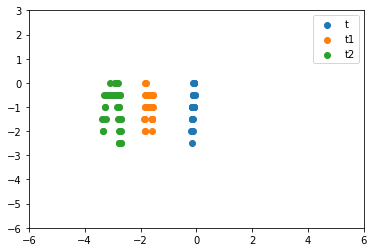

In [10]:
# plt.scatter(np.unwrap(p_f['PHASE']) - np.unwrap(p_t['PHASE']), p_f['RSSI'] - p_t['RSSI'])
# plt.scatter(np.unwrap(p_f['PHASE']) - np.unwrap(p_t1['PHASE']), p_f['RSSI'] - p_t1['RSSI'])
# plt.scatter(np.unwrap(p_f['PHASE']) - np.unwrap(p_t2['PHASE']), p_f['RSSI'] - p_t2['RSSI'])
plt.scatter(np.unwrap(p_f['PHASE']) - np.unwrap(p_t['PHASE']), p_f['RSSI'] - p_t['RSSI'])
plt.scatter(np.unwrap(p_f['PHASE']) - np.unwrap(p_t1['PHASE']), p_f['RSSI'] - p_t1['RSSI'])
plt.scatter(np.unwrap(p_f['PHASE']) - np.unwrap(p_t2['PHASE']), p_f['RSSI'] - p_t2['RSSI'])
plt.legend(['t', 't1', 't2'])
plt.xlim([-6, 6])
plt.ylim([-6, 3])

t ['water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'vinegar' 'water' 'water']
Correct 0.98
-------------------------------
t1 ['water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water']
Correct 1.0
-------------------------------
t2 ['water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'wate

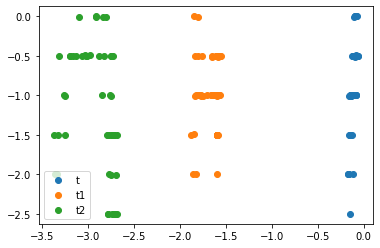

In [17]:
import joblib
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'
clf = joblib.load('model_all_nopi.joblib')

cnt = 0
correctcnt = 0

ts = ['t', 't1', 't2']
for t in ts:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd10_water_f_kde.csv'))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd10_water_%s_kde.csv' % (t)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    plt.scatter(diff_p, diff_r)
#     result = tree.predict(np.column_stack((diff_p, diff_r, df_t['CHANNEL'])))
    result = clf.predict(np.column_stack((diff_p, diff_r)))
    print(t, result)
    correct = (result=='water').sum()
    print('Correct', correct/len(df_f))
    cnt += len(df_f)
    correctcnt += correct
    print('-------------------------------')
plt.legend(ts)
print(correctcnt, cnt, correctcnt/cnt)